In [1]:
import numpy as np
import pandas as pd
from src.MLP import MLP

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/City_Types.csv')
columns_to_scale = list(data.select_dtypes(include='number').columns)
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['weekday'] = data['Date'].dt.weekday
data = data.drop(columns=['Date'])
y = data['Type']
x = data.drop(columns=['Type'])
x = pd.get_dummies(x)
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

Epoch 0 | Loss: 0.0562 | Accuracy: 0.9791
Epoch 10 | Loss: 0.0000 | Accuracy: 1.0000
Epoch 20 | Loss: 0.0000 | Accuracy: 1.0000
Epoch 30 | Loss: 0.0000 | Accuracy: 1.0000
Epoch 40 | Loss: 0.0000 | Accuracy: 1.0000


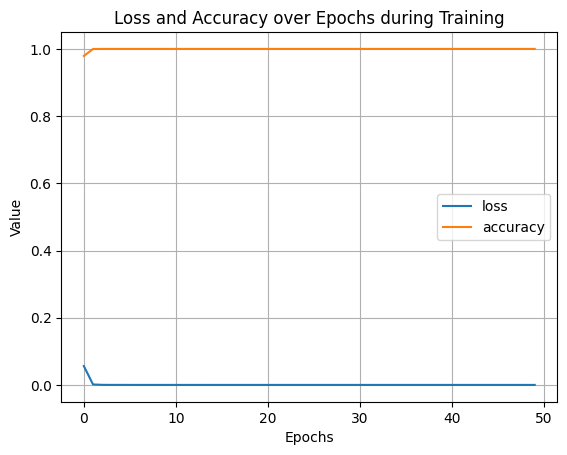

In [3]:
nin = len(x_train[0])
mlp = MLP(nin=nin, nouts=[8, 2], activation='relu')
mlp.train_model(x_train, y_train, epochs=50, print_report=True, print_graph=True)

In [4]:
mlp.evaluate_model(x_test, y_test, print_report=True)

TEST SET RESULTS
Test Accuracy: 1.0000 (10541/10541)
Test Loss: 0.0000
True distribution:
  Residential: 5221
  Industrial: 5320

Predicted distribution:
  Residential: 5221
  Industrial: 5320

Per-class accuracy:
  Residential: 1.0000 (5221/5221)
  Industrial: 1.0000 (5320/5320)
